<a href="https://colab.research.google.com/github/heeyun0301/portfolio/blob/master/Music_Calnedar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 2.6 MB/s eta 0:00:00


In [2]:
import datetime
import pandas as pd
from dateutil import parser
from spotipy import Spotify
from spotipy.oauth2 import SpotifyOAuth
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build

## Get Data using Google Calendar and Spotify API

In [3]:
SPOTIPY_CLIENT_ID = '39505304b4eb460aacdf0a90d8e63f37'
SPOTIPY_CLIENT_SECRET = '5c16f13a0d964ab3856e7002ec56ac92'
REDIRECT_URI = 'http://localhost:8888/callback'
SCOPES_SPOTIFY = ['user-read-recently-played']
SCOPES_GOOGLE = ['https://www.googleapis.com/auth/calendar.readonly']

In [5]:
sp = Spotify(auth_manager=SpotifyOAuth(
    client_id=SPOTIPY_CLIENT_ID,
    client_secret=SPOTIPY_CLIENT_SECRET,
    redirect_uri=REDIRECT_URI,
    scope=SCOPES_SPOTIFY,
    open_browser=False,
    show_dialog=True
))

recent_tracks = sp.current_user_recently_played(limit=50)['items']

Go to the following URL: https://accounts.spotify.com/authorize?client_id=39505304b4eb460aacdf0a90d8e63f37&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%3A8888%2Fcallback&scope=user-read-recently-played&show_dialog=True
Enter the URL you were redirected to: http://localhost:8888/callback?code=AQDXLU0LwI6JMWEFB4NCxjrBoLPOONFwe7riicYfTfWrLKF2-OPePCTh_lutaz3FyZ-rIA8oJ6kRf6oPTxGsrQUG2i5XNPy7aEkvns89uCVcsPPNniFPfDTLXnWH-fG5OUeTTDHhrbMHau0YPgjmytitadL38gs_jGcJHc5Lqi8sDdf4XdQnYIBfgsplaPkDtIGbG0uBAA1ALupcGg


In [6]:
recent_tracks[:5]

[{'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0hSFeqPehe7FtCNWuQ6Bsy'},
      'href': 'https://api.spotify.com/v1/artists/0hSFeqPehe7FtCNWuQ6Bsy',
      'id': '0hSFeqPehe7FtCNWuQ6Bsy',
      'name': 'BUMP OF CHICKEN',
      'type': 'artist',
      'uri': 'spotify:artist:0hSFeqPehe7FtCNWuQ6Bsy'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/0onaVQoaiffqxbds3QDR1m'},
    'href': 'https://api.spotify.com/v1/albums/0onaVQoaiffqxbds3QDR1m',
    'id': '0onaVQoaiffqxbds3QDR1m',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273f5017c120597ec5a35015ef6',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02f5017c120597ec5a35015ef6',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851f5017c120597ec5a35015ef6',
      'width': 64}],
    'is_playable': True,
    'name': 'jupiter',

In [7]:
track_data = []

for item in recent_tracks:
    track = item['track']
    played_at = parser.isoparse(item['played_at'])

    artist_name = track['artists'][0]['name']
    album_name = track['album']['name']
    duration_ms = track['duration_ms']
    duration_min = f"{duration_ms // 60000}:{(duration_ms % 60000) // 1000:02}"

    explicit = track.get('explicit', False)
    release_date = track['album'].get('release_date', '')
    year = int(release_date[:4]) if release_date else None

    track_data.append({
        'Song': track['name'],
        'Artist': artist_name,
        'Album': album_name,
        'Played At': played_at.strftime('%Y-%m-%d %H:%M'),
        'Duration': duration_min,
        'explicit': explicit,
        'release_date': release_date,
        'year': year
    })

df_tracks = pd.DataFrame(track_data)

In [8]:
import time

In [9]:
track_data = []

for item in recent_tracks:
    time.sleep(0.1)
    track = item['track']
    played_at = parser.isoparse(item['played_at'])

    artist_name = track['artists'][0]['name']
    album_name = track['album']['name']
    artist = track['artists'][0]
    artist_info = sp.artist(artist['id'])
    genres = artist_info.get('genres', [])
    duration_ms = track['duration_ms']
    duration_min = f"{duration_ms // 60000}:{(duration_ms % 60000) // 1000:02}"

    explicit = track.get('explicit', False)
    release_date = track['album'].get('release_date', '')
    year = int(release_date[:4]) if release_date else None

    track_data.append({
        'Song': track['name'],
        'Artist': artist_name,
        'Genres': genres,
        'Album': album_name,
        'Played At': played_at.strftime('%Y-%m-%d %H:%M'),
        'Duration': duration_min,
        'explicit': explicit,
        'release_date': release_date,
        'year': year
    })

df_tracks = pd.DataFrame(track_data)

In [10]:
df_tracks

,Song,Artist,Genres,Album,Played At,Duration,explicit,release_date,year
0,ダイヤモンド,BUMP OF CHICKEN,"[j-pop, j-rock, anime]",jupiter,2025-04-16 06:52,4:33,False,2002-02-20,2002
1,It's a small world,King Gnu,"[j-pop, anime, j-rock]",Sympa,2025-04-16 06:44,3:13,False,2019-01-16,2019
2,あの夢をなぞって,YOASOBI,"[j-pop, anime]",あの夢をなぞって,2025-04-16 06:41,4:02,False,2020-01-18,2020
3,僕に彼女ができたんだ,SHISHAMO,"[japanese indie, j-rock, j-pop]",SHISHAMO BEST,2025-04-16 06:33,3:08,False,2019-06-19,2019
4,傘,King Gnu,"[j-pop, anime, j-rock]",CEREMONY,2025-04-16 06:30,3:23,False,2020-01-15,2020
5,sweet memories,Yabai T-Shirts Yasan,"[j-rock, j-pop, melodic hardcore]",You need the Tank-top,2025-04-16 06:27,2:15,False,2020-09-30,2020
6,For Freedom,[Alexandros],"[j-rock, j-pop, anime]",Where's My Potato?,2025-04-16 06:24,3:48,False,2010-01-20,2010
7,Letter,04 Limited Sazabys,"[j-rock, melodic hardcore]",eureka,2025-04-16 06:21,3:46,False,2016-09-14,2016
8,左恋,indigo la End,"[japanese indie, j-rock, j-pop]",左恋,2025-04-16 06:17,3:28,False,2021-01-15,2021
9,Diver,NICO Touches the Walls,"[anime, j-rock, j-pop]",PASSENGER,2025-04-16 06:13,4:08,False,2011-04-06,2011


In [12]:
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build

SCOPES = ['https://www.googleapis.com/auth/calendar.readonly']

# Initialize the flow
flow = InstalledAppFlow.from_client_secrets_file(
    '/content/client_secret_36963426449-k8u6vcdv6ofbk9avu05sasbgunnbrkhh.apps.googleusercontent.com.json',
    scopes=SCOPES
)

# Force manual code auth (no redirect_uri error)
flow.redirect_uri = "http://localhost"

# Step 1: Get the auth URL
auth_url, _ = flow.authorization_url(prompt='consent')
print("🔗 Open this URL in your browser:\n", auth_url)

# Step 2: Copy the ?code=... from the browser URL bar after login
auth_code = input("\n📋 Paste the authorization code from the URL here: ")
flow.fetch_token(code=auth_code)

# Step 3: Build service with credentials
creds = flow.credentials
service = build('calendar', 'v3', credentials=creds)

print("✅ Success! You are now connected to your Google Calendar.")


🔗 Open this URL in your browser:
 https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=36963426449-k8u6vcdv6ofbk9avu05sasbgunnbrkhh.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcalendar.readonly&state=LsQFkuetLCwl0EkDW3pie4n0TzAkUn&prompt=consent&access_type=offline

📋 Paste the authorization code from the URL here: 4/0Ab_5qlmgY3BhD8XxHkh7xNRRnUP2OBbO9c1_MlwvxsdzaGdh3K3tqjbNByvUrS-_BRVNEA&
✅ Success! You are now connected to your Google Calendar.


In [13]:
calendar_Ids = ['heeyun0301@gmail.com', '4eftmvhso6p7hep4br0utbjktc@group.calendar.google.com', \
                '4or5tkgdlf756n3lo9ii22h480@group.calendar.google.com']

In [14]:
matchId = {'heeyun0301@gmail.com':"work", \
           '4eftmvhso6p7hep4br0utbjktc@group.calendar.google.com': 'class',
           '4or5tkgdlf756n3lo9ii22h480@group.calendar.google.com':'appointment'}
all_events = []


for id in calendar_Ids:
  calendar_events = service.events().list(
      calendarId = id,
      timeMin = '2025-03-01T00:00:00Z',
      timeMax = '2025-04-17T00:00:00Z',
      maxResults = 1000,
      singleEvents = True,
      orderBy = 'startTime'
  ).execute()

  events = calendar_events.get('items', [])
  for event in events:
    event['calendar_id'] = matchId[id]
    all_events.append(event)

df_calendar = pd.DataFrame(all_events)

In [15]:
df_calendar

,kind,etag,id,status,htmlLink,created,updated,summary,creator,organizer,...,originalStartTime,transparency,visibility,iCalUID,sequence,reminders,birthdayProperties,eventType,calendar_id,colorId
0,calendar#event,"""3478423727150000""",aamheis593rcbpr4g8oe2vjs4g_20250301,confirmed,https://www.google.com/calendar/event?eid=YWFt...,2025-01-22T07:17:09.000Z,2025-02-10T18:24:23.575Z,Happy birthday!,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,{'date': '2025-03-01'},transparent,private,aamheis593rcbpr4g8oe2vjs4g@google.com,0,{'useDefault': False},{'type': 'self'},birthday,work,NaN
1,calendar#event,"""3484006005813630""",6av0mk7m65t1pn870hjju2jj8k_20250301T053000Z,confirmed,https://www.google.com/calendar/event?eid=NmF2...,2024-03-05T03:34:46.000Z,2025-03-15T01:43:22.906Z,민우 201,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,"{'dateTime': '2025-03-01T14:30:00+09:00', 'tim...",NaN,NaN,6av0mk7m65t1pn870hjju2jj8k@google.com,9,{'useDefault': True},NaN,default,work,NaN
2,calendar#event,"""3485258323345854""",0jktfb598aqj3k24esekskbilt_20250301T073000Z,confirmed,https://www.google.com/calendar/event?eid=MGpr...,2024-11-13T14:03:07.000Z,2025-03-22T07:39:21.672Z,재인 201,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,"{'dateTime': '2025-03-01T16:30:00+09:00', 'tim...",NaN,NaN,0jktfb598aqj3k24esekskbilt@google.com,0,{'useDefault': True},NaN,default,work,NaN
3,calendar#event,"""3482328422275326""",0ulduru24fp3fh2ju6qmq0h5r9_20250305T060000Z,confirmed,https://www.google.com/calendar/event?eid=MHVs...,2025-03-02T03:52:10.000Z,2025-03-05T08:43:31.137Z,빅처실 근로 D105 (Ian pf),"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,"{'dateTime': '2025-03-05T15:00:00+09:00', 'tim...",NaN,NaN,0ulduru24fp3fh2ju6qmq0h5r9@google.com,1,{'useDefault': True},NaN,default,work,NaN
4,calendar#event,"""3481783266790366""",k4j9luelscen1hsrkvkbd6egjg,confirmed,https://www.google.com/calendar/event?eid=azRq...,2025-03-02T05:00:23.000Z,2025-03-02T05:00:33.395Z,벨라타임,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,NaN,NaN,NaN,k4j9luelscen1hsrkvkbd6egjg@google.com,0,{'useDefault': True},NaN,default,work,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,calendar#event,"""3485787679950814""",jdrd3ha6vtkgllg8s27ru5t44k,confirmed,https://www.google.com/calendar/event?eid=amRy...,2025-03-18T01:50:35.000Z,2025-03-25T09:10:39.975Z,긱 면담,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,NaN,NaN,NaN,jdrd3ha6vtkgllg8s27ru5t44k@google.com,1,{'useDefault': True},NaN,default,appointment,NaN
123,calendar#event,"""3488398972196158""",1rhsgmm7o6n3p1cvd49fokabe9_20250402T090000Z,confirmed,https://www.google.com/calendar/event?eid=MXJo...,2025-03-02T03:53:30.000Z,2025-04-09T11:51:26.098Z,합주,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,"{'dateTime': '2025-04-02T18:00:00+09:00', 'tim...",NaN,NaN,1rhsgmm7o6n3p1cvd49fokabe9@google.com,0,{'useDefault': True},NaN,default,appointment,NaN
124,calendar#event,"""3486798592608958""",54oavm03ae8cjukdg0q4dohe0l,confirmed,https://www.google.com/calendar/event?eid=NTRv...,2025-03-31T05:34:56.000Z,2025-03-31T05:34:56.304Z,슴민 영화,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,NaN,transparent,NaN,54oavm03ae8cjukdg0q4dohe0l@google.com,0,{'useDefault': False},NaN,default,appointment,NaN
125,calendar#event,"""3488398972196158""",1rhsgmm7o6n3p1cvd49fokabe9_20250409T090000Z,confirmed,https://www.google.com/calendar/event?eid=MXJo...,2025-03-02T03:53:30.000Z,2025-04-09T11:51:26.098Z,합주,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,"{'dateTime': '2025-04-09T18:00:00+09:00', 'tim...",NaN,Na

In [16]:
df_calendar[df_calendar['calendar_id']=='appointment']['summary'].unique()

array(['합주', '밥약', '슴믽 타코로코', '여은', '스크그', '라스트마일', '긱 면담', '슴민 영화',
       '부활절'], dtype=object)

In [17]:
print(df_calendar[df_calendar['calendar_id']=='appointment'][['summary', 'start']])

     summary                                              start
113       합주  {'dateTime': '2025-03-05T18:00:00+09:00', 'tim...
114       밥약  {'dateTime': '2025-03-11T11:45:00+09:00', 'tim...
115       합주  {'dateTime': '2025-03-12T18:00:00+09:00', 'tim...
116  슴믽 타코로코  {'dateTime': '2025-03-13T12:30:00+09:00', 'tim...
117       여은                             {'date': '2025-03-17'}
118       합주  {'dateTime': '2025-03-19T18:00:00+09:00', 'tim...
119      스크그  {'dateTime': '2025-03-21T07:00:00+09:00', 'tim...
120       합주  {'dateTime': '2025-03-26T18:00:00+09:00', 'tim...
121    라스트마일  {'dateTime': '2025-03-27T19:55:00+09:00', 'tim...
122     긱 면담  {'dateTime': '2025-04-01T10:30:00+09:00', 'tim...
123       합주  {'dateTime': '2025-04-02T18:00:00+09:00', 'tim...
124    슴민 영화                             {'date': '2025-04-07'}
125       합주  {'dateTime': '2025-04-09T18:00:00+09:00', 'tim...
126      부활절                             {'date': '2025-04-17'}


In [18]:
df_tracks.columns

Index(['Song', 'Artist', 'Genres', 'Album', 'Played At', 'Duration',
       'explicit', 'release_date', 'year'],
      dtype='object')

In [19]:
#drop columns that has nan in starttime in calendar
df_calendar = df_calendar.dropna(subset=['start'])
df_calendar

,kind,etag,id,status,htmlLink,created,updated,summary,creator,organizer,...,originalStartTime,transparency,visibility,iCalUID,sequence,reminders,birthdayProperties,eventType,calendar_id,colorId
0,calendar#event,"""3478423727150000""",aamheis593rcbpr4g8oe2vjs4g_20250301,confirmed,https://www.google.com/calendar/event?eid=YWFt...,2025-01-22T07:17:09.000Z,2025-02-10T18:24:23.575Z,Happy birthday!,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,{'date': '2025-03-01'},transparent,private,aamheis593rcbpr4g8oe2vjs4g@google.com,0,{'useDefault': False},{'type': 'self'},birthday,work,NaN
1,calendar#event,"""3484006005813630""",6av0mk7m65t1pn870hjju2jj8k_20250301T053000Z,confirmed,https://www.google.com/calendar/event?eid=NmF2...,2024-03-05T03:34:46.000Z,2025-03-15T01:43:22.906Z,민우 201,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,"{'dateTime': '2025-03-01T14:30:00+09:00', 'tim...",NaN,NaN,6av0mk7m65t1pn870hjju2jj8k@google.com,9,{'useDefault': True},NaN,default,work,NaN
2,calendar#event,"""3485258323345854""",0jktfb598aqj3k24esekskbilt_20250301T073000Z,confirmed,https://www.google.com/calendar/event?eid=MGpr...,2024-11-13T14:03:07.000Z,2025-03-22T07:39:21.672Z,재인 201,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,"{'dateTime': '2025-03-01T16:30:00+09:00', 'tim...",NaN,NaN,0jktfb598aqj3k24esekskbilt@google.com,0,{'useDefault': True},NaN,default,work,NaN
3,calendar#event,"""3482328422275326""",0ulduru24fp3fh2ju6qmq0h5r9_20250305T060000Z,confirmed,https://www.google.com/calendar/event?eid=MHVs...,2025-03-02T03:52:10.000Z,2025-03-05T08:43:31.137Z,빅처실 근로 D105 (Ian pf),"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,"{'dateTime': '2025-03-05T15:00:00+09:00', 'tim...",NaN,NaN,0ulduru24fp3fh2ju6qmq0h5r9@google.com,1,{'useDefault': True},NaN,default,work,NaN
4,calendar#event,"""3481783266790366""",k4j9luelscen1hsrkvkbd6egjg,confirmed,https://www.google.com/calendar/event?eid=azRq...,2025-03-02T05:00:23.000Z,2025-03-02T05:00:33.395Z,벨라타임,"{'email': 'heeyun0301@gmail.com', 'self': True}","{'email': 'heeyun0301@gmail.com', 'self': True}",...,NaN,NaN,NaN,k4j9luelscen1hsrkvkbd6egjg@google.com,0,{'useDefault': True},NaN,default,work,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,calendar#event,"""3485787679950814""",jdrd3ha6vtkgllg8s27ru5t44k,confirmed,https://www.google.com/calendar/event?eid=amRy...,2025-03-18T01:50:35.000Z,2025-03-25T09:10:39.975Z,긱 면담,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,NaN,NaN,NaN,jdrd3ha6vtkgllg8s27ru5t44k@google.com,1,{'useDefault': True},NaN,default,appointment,NaN
123,calendar#event,"""3488398972196158""",1rhsgmm7o6n3p1cvd49fokabe9_20250402T090000Z,confirmed,https://www.google.com/calendar/event?eid=MXJo...,2025-03-02T03:53:30.000Z,2025-04-09T11:51:26.098Z,합주,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,"{'dateTime': '2025-04-02T18:00:00+09:00', 'tim...",NaN,NaN,1rhsgmm7o6n3p1cvd49fokabe9@google.com,0,{'useDefault': True},NaN,default,appointment,NaN
124,calendar#event,"""3486798592608958""",54oavm03ae8cjukdg0q4dohe0l,confirmed,https://www.google.com/calendar/event?eid=NTRv...,2025-03-31T05:34:56.000Z,2025-03-31T05:34:56.304Z,슴민 영화,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,NaN,transparent,NaN,54oavm03ae8cjukdg0q4dohe0l@google.com,0,{'useDefault': False},NaN,default,appointment,NaN
125,calendar#event,"""3488398972196158""",1rhsgmm7o6n3p1cvd49fokabe9_20250409T090000Z,confirmed,https://www.google.com/calendar/event?eid=MXJo...,2025-03-02T03:53:30.000Z,2025-04-09T11:51:26.098Z,합주,{'email': 'heeyun0301@gmail.com'},{'email': '4or5tkgdlf756n3lo9ii22h480@group.ca...,...,"{'dateTime': '2025-04-09T18:00:00+09:00', 'tim...",NaN,Na

In [20]:
df_tracks.to_csv('recent50songs.csv')
df_calendar.to_csv('recent1000events.csv')

In [21]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   kind                127 non-null    object
 1   etag                127 non-null    object
 2   id                  127 non-null    object
 3   status              127 non-null    object
 4   htmlLink            127 non-null    object
 5   created             127 non-null    object
 6   updated             127 non-null    object
 7   summary             127 non-null    object
 8   creator             127 non-null    object
 9   organizer           127 non-null    object
 10  start               127 non-null    object
 11  end                 127 non-null    object
 12  recurringEventId    107 non-null    object
 13  originalStartTime   107 non-null    object
 14  transparency        4 non-null      object
 15  visibility          1 non-null      object
 16  iCalUID             127 no

In [22]:
df_calendar['start'].tail()

,start
122,"{'dateTime': '2025-04-01T10:30:00+09:00', 'tim..."
123,"{'dateTime': '2025-04-02T18:00:00+09:00', 'tim..."
124,{'date': '2025-04-07'}
125,"{'dateTime': '2025-04-09T18:00:00+09:00', 'tim..."
126,{'date': '2025-04-17'}


In [23]:
# I only need summary, start, end, calendar_id

df_calendar = df_calendar[['summary', 'start', 'end', 'calendar_id']]

In [24]:
print(f"df_calendar is now shape: {df_calendar.shape}\nHas columns: {df_calendar.columns}")

df_calendar is now shape: (127, 4)
Has columns: Index(['summary', 'start', 'end', 'calendar_id'], dtype='object')


In [25]:
df_calendar['start'][1]

{'dateTime': '2025-03-01T14:30:00+09:00', 'timeZone': 'Asia/Seoul'}

## Clean Data

In [26]:
def extract_datetime(event_time):
    if isinstance(event_time, dict):
        if 'dateTime' in event_time:
            return pd.to_datetime(event_time['dateTime'], utc=True)
        elif 'date' in event_time:
            return pd.to_datetime(event_time['date'], utc=True)
    return pd.NaT

df_calendar['start'] = df_calendar['start'].apply(extract_datetime)
df_calendar['end'] = df_calendar['end'].apply(extract_datetime)

<ipython-input-26-9fb1bf0d500c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar['start'] = df_calendar['start'].apply(extract_datetime)
<ipython-input-26-9fb1bf0d500c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar['end'] = df_calendar['end'].apply(extract_datetime)


In [27]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   summary      127 non-null    object             
 1   start        127 non-null    datetime64[ns, UTC]
 2   end          127 non-null    datetime64[ns, UTC]
 3   calendar_id  127 non-null    object             
dtypes: datetime64[ns, UTC](2), object(2)
memory usage: 4.1+ KB


In [28]:
df_calendar['summary'].unique()

array(['Happy birthday!', '민우 201', '재인 201', '빅처실 근로 D105 (Ian pf)',
       '벨라타임', '시넴아텍 인터뷰', '스크그 미팅', '데비 회의', '스크그', '필름메이킹워크샵', '빅처실 근로',
       '인크컴 X513 (김주섭pf)', '인소아 X513 (오예민pf)', '벨라 OT',
       'Data Visualization X513 (김재원pf)', '서양음악 Zoom (신혜승pf)',
       'Generative AI X423 (정해동)', '미디', '음악쓰기 J319 (신혜승pf)', '테니스', '기타',
       '법지재 Zoom (안재형pf) ', '조명워크샵', 'Generative AI X423 (정해동) - 자리결정',
       '데비회의', '젠아이 회의', '합주', '밥약', '슴믽 타코로코', '여은', '라스트마일', '긱 면담',
       '슴민 영화', '부활절'], dtype=object)

In [29]:
print(df_calendar[df_calendar['calendar_id']=='appointment'])

     summary                     start                       end  calendar_id
113       합주 2025-03-05 09:00:00+00:00 2025-03-05 12:00:00+00:00  appointment
114       밥약 2025-03-11 02:45:00+00:00 2025-03-11 03:45:00+00:00  appointment
115       합주 2025-03-12 09:00:00+00:00 2025-03-12 12:00:00+00:00  appointment
116  슴믽 타코로코 2025-03-13 03:30:00+00:00 2025-03-13 04:30:00+00:00  appointment
117       여은 2025-03-17 00:00:00+00:00 2025-03-18 00:00:00+00:00  appointment
118       합주 2025-03-19 09:00:00+00:00 2025-03-19 11:00:00+00:00  appointment
119      스크그 2025-03-20 22:00:00+00:00 2025-03-21 00:00:00+00:00  appointment
120       합주 2025-03-26 09:00:00+00:00 2025-03-26 12:00:00+00:00  appointment
121    라스트마일 2025-03-27 10:55:00+00:00 2025-03-27 13:00:00+00:00  appointment
122     긱 면담 2025-04-01 01:30:00+00:00 2025-04-01 01:50:00+00:00  appointment
123       합주 2025-04-02 09:00:00+00:00 2025-04-02 12:00:00+00:00  appointment
124    슴민 영화 2025-04-07 00:00:00+00:00 2025-04-08 00:00:00+00:00

In [30]:
#sort df_calendar in order of start time

df_calendar = df_calendar.sort_values(by='start').reset_index(drop=True)
df_calendar.head()

,summary,start,end,calendar_id
0,Happy birthday!,2025-03-01 00:00:00+00:00,2025-03-02 00:00:00+00:00,work
1,민우 201,2025-03-01 05:30:00+00:00,2025-03-01 07:30:00+00:00,work
2,재인 201,2025-03-01 07:30:00+00:00,2025-03-01 09:00:00+00:00,work
3,인크컴 X513 (김주섭pf),2025-03-04 00:00:00+00:00,2025-03-04 01:15:00+00:00,class
4,인소아 X513 (오예민pf),2025-03-04 04:30:00+00:00,2025-03-04 07:15:00+00:00,class


In [31]:
df_tracks['Played At DT'] = pd.to_datetime(df_tracks['Played At'], utc=True).dt.tz_convert('Asia/Seoul')
df_calendar['start'] = pd.to_datetime(df_calendar['start']).dt.tz_convert('Asia/Seoul')
df_calendar['end'] = pd.to_datetime(df_calendar['end']).dt.tz_convert('Asia/Seoul')

print(df_tracks.head())
print(df_calendar.tail())

                 Song           Artist                           Genres  \
0              ダイヤモンド  BUMP OF CHICKEN           [j-pop, j-rock, anime]   
1  It's a small world         King Gnu           [j-pop, anime, j-rock]   
2            あの夢をなぞって          YOASOBI                   [j-pop, anime]   
3          僕に彼女ができたんだ         SHISHAMO  [japanese indie, j-rock, j-pop]   
4                   傘         King Gnu           [j-pop, anime, j-rock]   

           Album         Played At Duration  explicit release_date  year  \
0        jupiter  2025-04-16 06:52     4:33     False   2002-02-20  2002   
1          Sympa  2025-04-16 06:44     3:13     False   2019-01-16  2019   
2       あの夢をなぞって  2025-04-16 06:41     4:02     False   2020-01-18  2020   
3  SHISHAMO BEST  2025-04-16 06:33     3:08     False   2019-06-19  2019   
4       CEREMONY  2025-04-16 06:30     3:23     False   2020-01-15  2020   

               Played At DT  
0 2025-04-16 15:52:00+09:00  
1 2025-04-16 15:44:00+09:00  
2 

In [32]:

# Let's pair songs with its closest event
# It would have been better with more songs ... but 50 songs is limit for the api



matched_rows = []
for _, track in df_tracks.iterrows():
    song_time = track['Played At DT']

    # Skip if song time is NaT
    if pd.isna(song_time):
        continue

    # Calculate absolute time difference
    df_calendar['time_diff'] = df_calendar['start'].apply(
        lambda t: abs(t - song_time) if pd.notnull(t) else pd.Timedelta('9999 days')
    )

    # Get the closest event
    closest_event = df_calendar.loc[df_calendar['time_diff'].idxmin()]

    event_summary = closest_event['summary']
    calendar_group = closest_event['calendar_id']
    event_start = closest_event['start']
    time_diff = closest_event['time_diff']

    # Build row for output
    matched_rows.append({
        'Song': track['Song'],
        'Artist': track['Artist'],
        'Genres': ', '.join(track['Genres']) if isinstance(track['Genres'], list) else track['Genres'],
        'Played_At_DT': track['Played At DT'],
        'Calendar_Event': event_summary,
        'Calendar_Group': calendar_group,
        'Event_Start': event_start,
        'Time_Difference': time_diff
    })

# STEP 3: Final result DataFrame
df_song_event_matched = pd.DataFrame(matched_rows)
print(df_song_event_matched.head())

                 Song           Artist                         Genres  \
0              ダイヤモンド  BUMP OF CHICKEN           j-pop, j-rock, anime   
1  It's a small world         King Gnu           j-pop, anime, j-rock   
2            あの夢をなぞって          YOASOBI                   j-pop, anime   
3          僕に彼女ができたんだ         SHISHAMO  japanese indie, j-rock, j-pop   
4                   傘         King Gnu           j-pop, anime, j-rock   

               Played_At_DT Calendar_Event Calendar_Group  \
0 2025-04-16 15:52:00+09:00         빅처실 근로           work   
1 2025-04-16 15:44:00+09:00         빅처실 근로           work   
2 2025-04-16 15:41:00+09:00         빅처실 근로           work   
3 2025-04-16 15:33:00+09:00         빅처실 근로           work   
4 2025-04-16 15:30:00+09:00         빅처실 근로           work   

                Event_Start Time_Difference  
0 2025-04-16 15:00:00+09:00 0 days 00:52:00  
1 2025-04-16 15:00:00+09:00 0 days 00:44:00  
2 2025-04-16 15:00:00+09:00 0 days 00:41:00  
3 2025-04-

In [33]:
df_calendar[['summary', 'start']].head()

,summary,start
0,Happy birthday!,2025-03-01 09:00:00+09:00
1,민우 201,2025-03-01 14:30:00+09:00
2,재인 201,2025-03-01 16:30:00+09:00
3,인크컴 X513 (김주섭pf),2025-03-04 09:00:00+09:00
4,인소아 X513 (오예민pf),2025-03-04 13:30:00+09:00


In [34]:
df_song_event_matched[df_song_event_matched['Event_Start'].notna()]

,Song,Artist,Genres,Played_At_DT,Calendar_Event,Calendar_Group,Event_Start,Time_Difference
0,ダイヤモンド,BUMP OF CHICKEN,"j-pop, j-rock, anime",2025-04-16 15:52:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:52:00
1,It's a small world,King Gnu,"j-pop, anime, j-rock",2025-04-16 15:44:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:44:00
2,あの夢をなぞって,YOASOBI,"j-pop, anime",2025-04-16 15:41:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:41:00
3,僕に彼女ができたんだ,SHISHAMO,"japanese indie, j-rock, j-pop",2025-04-16 15:33:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:33:00
4,傘,King Gnu,"j-pop, anime, j-rock",2025-04-16 15:30:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:30:00
5,sweet memories,Yabai T-Shirts Yasan,"j-rock, j-pop, melodic hardcore",2025-04-16 15:27:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:27:00
6,For Freedom,[Alexandros],"j-rock, j-pop, anime",2025-04-16 15:24:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:24:00
7,Letter,04 Limited Sazabys,"j-rock, melodic hardcore",2025-04-16 15:21:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:21:00
8,左恋,indigo la End,"japanese indie, j-rock, j-pop",2025-04-16 15:17:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:17:00
9,Diver,NICO Touches the Walls,"anime, j-rock, j-pop",2025-04-16 15:13:00+09:00,빅처실 근로,work,2025-04-16 15:00:00+09:00,0 days 00:13:00


In [35]:
df_song_event_matched.to_csv("Song_event_matched.csv")

In [36]:
df_calendar

,summary,start,end,calendar_id,time_diff
0,Happy birthday!,2025-03-01 09:00:00+09:00,2025-03-02 09:00:00+09:00,work,45 days 15:16:00
1,민우 201,2025-03-01 14:30:00+09:00,2025-03-01 16:30:00+09:00,work,45 days 09:46:00
2,재인 201,2025-03-01 16:30:00+09:00,2025-03-01 18:00:00+09:00,work,45 days 07:46:00
3,인크컴 X513 (김주섭pf),2025-03-04 09:00:00+09:00,2025-03-04 10:15:00+09:00,class,42 days 15:16:00
4,인소아 X513 (오예민pf),2025-03-04 13:30:00+09:00,2025-03-04 16:15:00+09:00,class,42 days 10:46:00
...,...,...,...,...,...
122,기타,2025-04-15 17:00:00+09:00,2025-04-15 18:00:00+09:00,class,0 days 07:16:00
123,Data Visualization X513 (김재원pf),2025-04-16 09:00:00+09:00,2025-04-16 10:15:00+09:00,class,0 days 08:44:00
124,서양음악 Zoom (신혜승pf),2025-04-16 12:00:00+09:00,2025-04-16 13:50:00+09:00,class,0 days 11:44:00
125,빅처실 근로,2025-04-16 15:00:00+09:00,2025-04-16 16:15:00+09:00,work,0 days 14:44:00


## Data Analysis

now we have three dataset
- df_tracks
- df_calendar
- df_song_event_matched

But since tracks data is incomplete for now, (only 50 songs) let's analyze df_calendar.

In [37]:
df_calendar

,summary,start,end,calendar_id,time_diff
0,Happy birthday!,2025-03-01 09:00:00+09:00,2025-03-02 09:00:00+09:00,work,45 days 15:16:00
1,민우 201,2025-03-01 14:30:00+09:00,2025-03-01 16:30:00+09:00,work,45 days 09:46:00
2,재인 201,2025-03-01 16:30:00+09:00,2025-03-01 18:00:00+09:00,work,45 days 07:46:00
3,인크컴 X513 (김주섭pf),2025-03-04 09:00:00+09:00,2025-03-04 10:15:00+09:00,class,42 days 15:16:00
4,인소아 X513 (오예민pf),2025-03-04 13:30:00+09:00,2025-03-04 16:15:00+09:00,class,42 days 10:46:00
...,...,...,...,...,...
122,기타,2025-04-15 17:00:00+09:00,2025-04-15 18:00:00+09:00,class,0 days 07:16:00
123,Data Visualization X513 (김재원pf),2025-04-16 09:00:00+09:00,2025-04-16 10:15:00+09:00,class,0 days 08:44:00
124,서양음악 Zoom (신혜승pf),2025-04-16 12:00:00+09:00,2025-04-16 13:50:00+09:00,class,0 days 11:44:00
125,빅처실 근로,2025-04-16 15:00:00+09:00,2025-04-16 16:15:00+09:00,work,0 days 14:44:00


In [45]:
cal = df_calendar.drop(columns = 'time_diff', axis = 1)
cal['start_date'] = cal['start'].dt.date

In [46]:
cal

,summary,start,end,calendar_id,start_date
0,Happy birthday!,2025-03-01 09:00:00+09:00,2025-03-02 09:00:00+09:00,work,2025-03-01
1,민우 201,2025-03-01 14:30:00+09:00,2025-03-01 16:30:00+09:00,work,2025-03-01
2,재인 201,2025-03-01 16:30:00+09:00,2025-03-01 18:00:00+09:00,work,2025-03-01
3,인크컴 X513 (김주섭pf),2025-03-04 09:00:00+09:00,2025-03-04 10:15:00+09:00,class,2025-03-04
4,인소아 X513 (오예민pf),2025-03-04 13:30:00+09:00,2025-03-04 16:15:00+09:00,class,2025-03-04
...,...,...,...,...,...
122,기타,2025-04-15 17:00:00+09:00,2025-04-15 18:00:00+09:00,class,2025-04-15
123,Data Visualization X513 (김재원pf),2025-04-16 09:00:00+09:00,2025-04-16 10:15:00+09:00,class,2025-04-16
124,서양음악 Zoom (신혜승pf),2025-04-16 12:00:00+09:00,2025-04-16 13:50:00+09:00,class,2025-04-16
125,빅처실 근로,2025-04-16 15:00:00+09:00,2025-04-16 16:15:00+09:00,work,2025-04-16


### When was the busiest day?

In [47]:
c = cal.groupby('start_date').size().sort_values(ascending = False)

#print top 5 busiest days
print(c.head())

start_date
2025-03-11    6
2025-03-05    5
2025-03-19    5
2025-04-01    5
2025-04-02    5
dtype: int64


<Axes: title={'center': 'Event Count per Day'}, xlabel='start_date'>

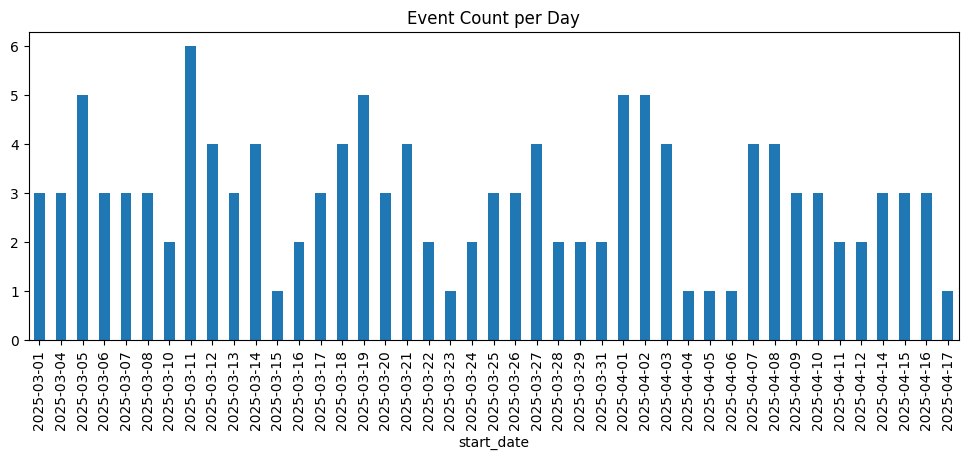

In [49]:
c = c.sort_index()
c.plot(kind = 'bar', figsize = (12, 4), title = 'Event Count per Day')

In [51]:
cal['duration_min'] = (cal['end'] - cal['start']).dt.total_seconds() / 60

In [52]:
print(cal.head())

cal['duration_min'].describe()

            summary                     start                       end  \
0   Happy birthday! 2025-03-01 09:00:00+09:00 2025-03-02 09:00:00+09:00   
1            민우 201 2025-03-01 14:30:00+09:00 2025-03-01 16:30:00+09:00   
2            재인 201 2025-03-01 16:30:00+09:00 2025-03-01 18:00:00+09:00   
3  인크컴 X513 (김주섭pf) 2025-03-04 09:00:00+09:00 2025-03-04 10:15:00+09:00   
4  인소아 X513 (오예민pf) 2025-03-04 13:30:00+09:00 2025-03-04 16:15:00+09:00   

  calendar_id  start_date  duration_min  
0        work  2025-03-01        1440.0  
1        work  2025-03-01         120.0  
2        work  2025-03-01          90.0  
3       class  2025-03-04          75.0  
4       class  2025-03-04         165.0  


,duration_min
count,127.000000
mean,142.401575
std,240.138725
min,15.000000
25%,67.500000
50%,75.000000
75%,122.500000
max,1440.000000


### Which day in week am I most busy?

<Axes: title={'center': 'Weekdays'}, xlabel='day_name'>

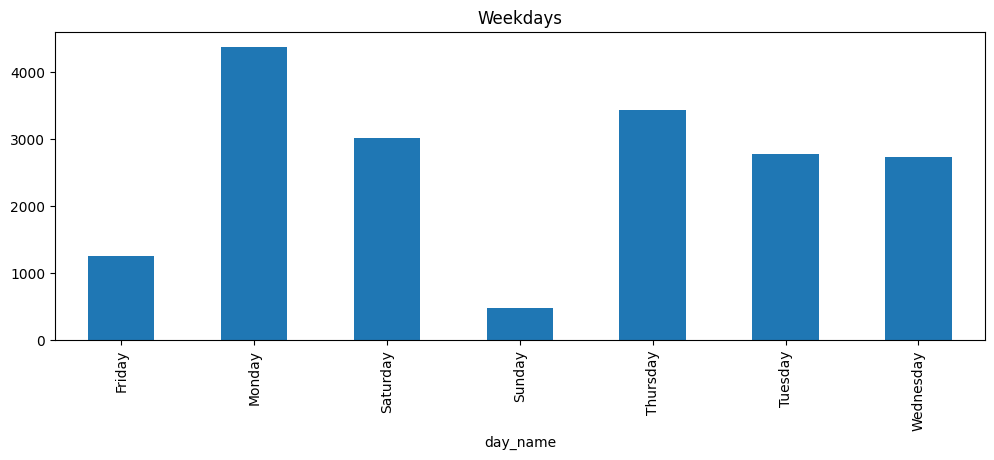

In [53]:
cal['day_name'] = cal['start'].dt.day_name()
cal.groupby('day_name')['duration_min'].sum().plot(kind = 'bar', figsize = (12, 4), title = 'Weekdays')

### What time do I usually start / finish my day?

In [66]:
c = cal.copy()

c = c.groupby('start_date')['start'].min()
c = c.reset_index()

c.columns = ['Date', 'earliest_time']

c['earliest_minutes'] = c['earliest_time'].apply(lambda t: t.hour * 60 + t.minute)
avg_minutes = int(c['earliest_minutes'].mean())
avg_time = datetime.time(hour=avg_minutes // 60, minute=avg_minutes % 60)

print(f"In Average, you start your day at {avg_time.strftime('%H:%M')}")

In Average, you start your day at 10:23


In [69]:
cc = cal.copy()

cc = cc.groupby('start_date')['end'].max()
cc = cc.reset_index()

cc.columns = ['Date', 'latest_time']

cc['latest_minutes'] = cc['latest_time'].apply(lambda t: t.hour * 60 + t.minute)
avg_minutes = int(cc['latest_minutes'].mean())
avg_time = datetime.time(hour=avg_minutes // 60, minute=avg_minutes % 60)

print(f"In Average, you end your day at {avg_time.strftime('%H:%M')}")

In Average, you end your day at 18:14


##Filtering?

### Events that are too late or too early

In [70]:
early_or_late = df_calendar[
    (df_calendar['start'].dt.hour < 9) |
    (df_calendar['end'].dt.hour >= 22)
]
early_or_late

,summary,start,end,calendar_id,time_diff,duration_min
5,벨라 OT,2025-03-04 19:30:00+09:00,2025-03-04 22:30:00+09:00,class,42 days 04:46:00,180.0
10,벨라타임,2025-03-05 23:30:00+09:00,2025-03-05 23:45:00+09:00,work,41 days 00:46:00,15.0
27,스크그 미팅,2025-03-11 22:30:00+09:00,2025-03-11 23:30:00+09:00,work,35 days 01:46:00,60.0
35,스크그,2025-03-14 07:00:00+09:00,2025-03-14 09:00:00+09:00,work,32 days 17:16:00,120.0
57,스크그,2025-03-21 07:00:00+09:00,2025-03-21 09:00:00+09:00,appointment,25 days 17:16:00,120.0
63,스크그,2025-03-23 19:00:00+09:00,2025-03-23 22:00:00+09:00,work,23 days 05:16:00,180.0
75,라스트마일,2025-03-27 19:55:00+09:00,2025-03-27 22:00:00+09:00,appointment,19 days 04:21:00,125.0
102,젠아이 회의,2025-04-07 22:00:00+09:00,2025-04-07 23:00:00+09:00,class,8 days 02:16:00,60.0


It turns out the reason I am exhausted is usually bc of team meetings

### Where did my weekend go?

In [71]:
weekend_events = cal[cal['day_name'].isin(['Saturday', 'Sunday'])]

In [73]:
import matplotlib.pyplot as plt

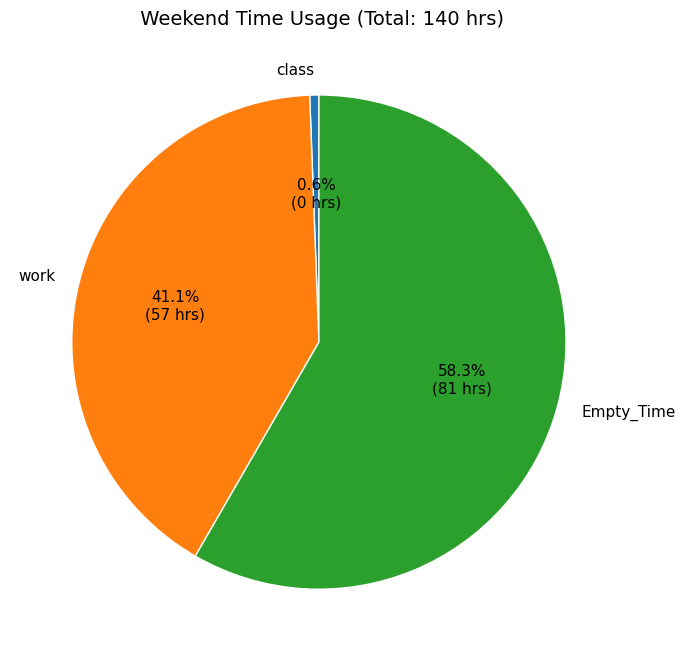

In [79]:

#total possible weekend time
weekend_days = weekend_events['start'].dt.date.nunique()
usable_minutes = weekend_days * 14 * 60

#time per calendar
used_time = weekend_events.groupby('calendar_id')['duration_min'].sum()

#empty time
empty_time = max(0, usable_minutes - used_time.sum())

time_breakdown = used_time.copy()
time_breakdown['Empty_Time'] = empty_time

plt.figure(figsize=(7, 7))

time_breakdown.plot(
    kind='pie',
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*usable_minutes)//60} hrs)',
    startangle=90,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 11}
)

plt.title(f" Weekend Time Usage (Total: {usable_minutes//60} hrs)", fontsize=14)
plt.ylabel('')
plt.tight_layout()
plt.show()